# HR analytics: Dismissal problem 

All companies face the problem of resigning workers due to reasonable factors such as a low wage, unsatisfied with tasks, poor corporate culture and so on. It is harmful for owners to lose such key workers, therefore, it is quite important to have an undestanding that potential person might dismiss. For this purpose, we have a dataset that contains information of possible factors that contribute worker to resign and we have to predict whether a person does it or not

In [179]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [203]:
df=pd.read_csv('../dataset/HR_comma_sep.csv')

In [181]:
print(df.shape)
df.head(15)

(14999, 10)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## Lets start data cleaning

1. Check for NaN values
2. Check for correct variables' type
3. Check the short description of numeric and categorical features

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Great news! We do not have Null values and types of variables are correct

In [183]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [184]:
df.describe(include='object')

,Department,salary
count,14999,14999
unique,10,3
top,sales,low
freq,4140,7316


In [185]:
df['Department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64

In [186]:
df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

## Exploratory Data Analysis

### Univariate visualization

Set numeric features 

In [187]:
target=['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company']

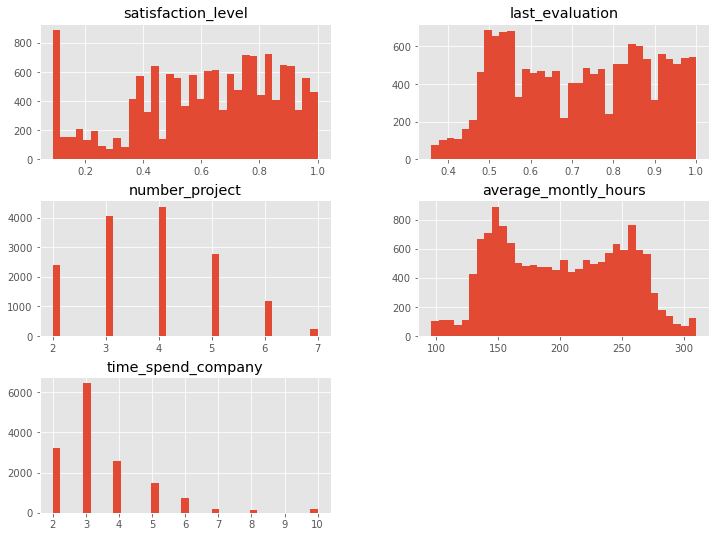

In [188]:
ax=df[target].hist(bins=35,figsize=(12,9))

__Satisfaction level__ : There are a lot of employees who unsatisfied with current work \
__Average monthly hours__ : Two peaks on both 150 and ~260 hours \
__Time spend in company__ : Most people are working for 3 years

Lets analyze categorical features

In [189]:
binary=['left','Work_accident','Department','salary','promotion_last_5years']

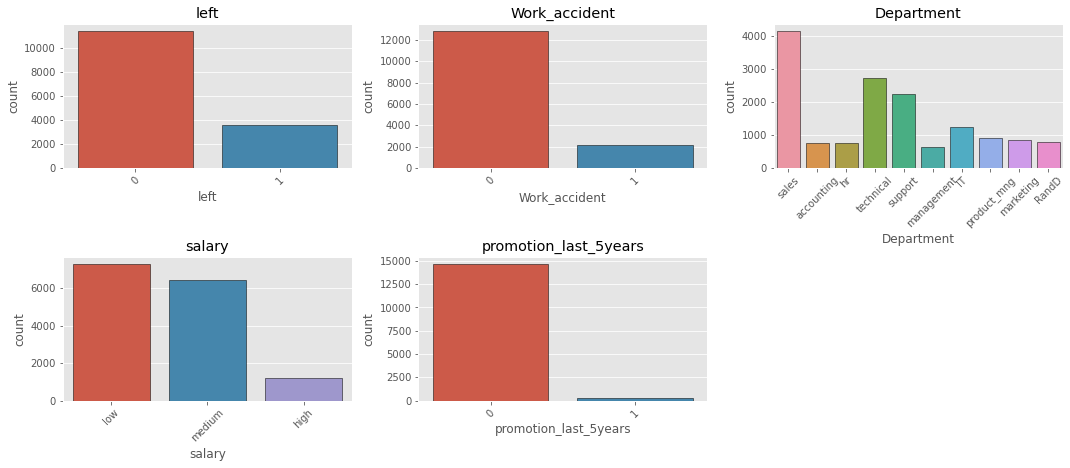

In [190]:
f=plt.figure(figsize=(15,9))
for i,feature in enumerate(binary):
    f.add_subplot(3,3,i+1)
    sns.countplot(x=feature,data=df,edgecolor='black')
    plt.title(feature)
    plt.xticks(rotation=45)
plt.tight_layout()

In [191]:
def numeric_vs_categoric(division,title):
    f=plt.figure(figsize=(17,9))
    for i,feature in enumerate(target):
        f.add_subplot(3,3,i+1)
        ax=sns.boxplot(y=feature,x=division,data=df)
        plt.xticks(rotation=45)
        plt.title(feature)
    ax.figure.suptitle('Features by '+title+ ' division',fontsize=20)
    plt.tight_layout()

### Multivariate visualization 

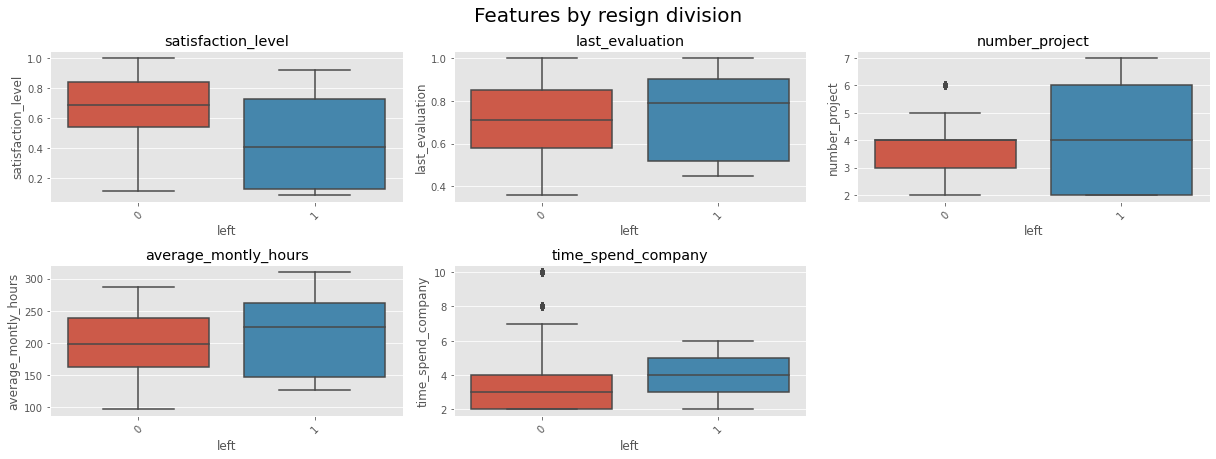

In [192]:
numeric_vs_categoric('left','resign')

We can see obvious patterns regarding satsfaction level, avg. hours of work and time spend in company. Most employees tend to left the firm because of low satisfaction level, higher number of hours at work, high number of years in company, __HOWEVER__ \
I had a fundamental assumption that the more projects worker recieve the more interesting he finds to work in the firm. Apparently, people are overwhelmed with the number of projects since they spend more time at work and sacrify their personal life

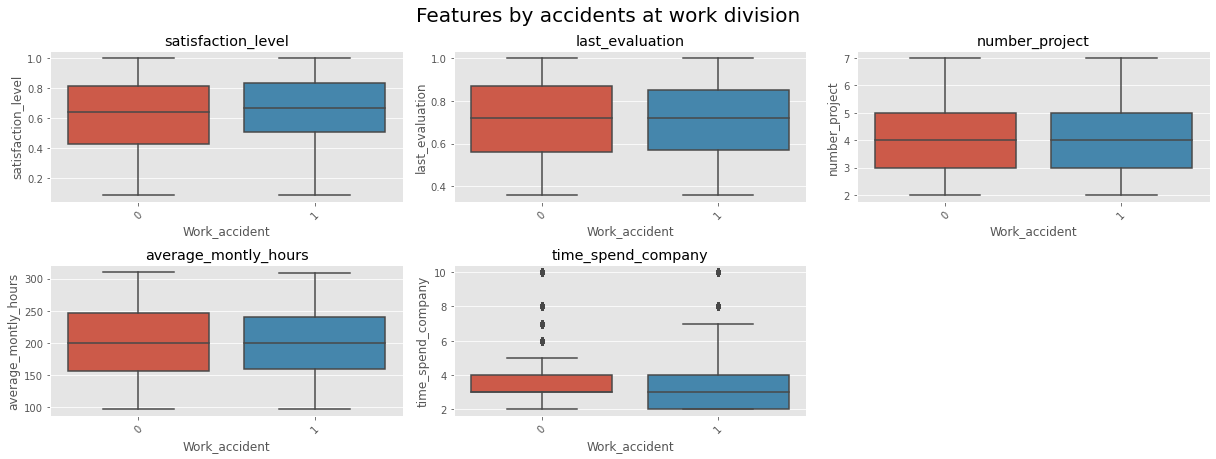

In [193]:
numeric_vs_categoric('Work_accident','accidents at work')

No clear patterns

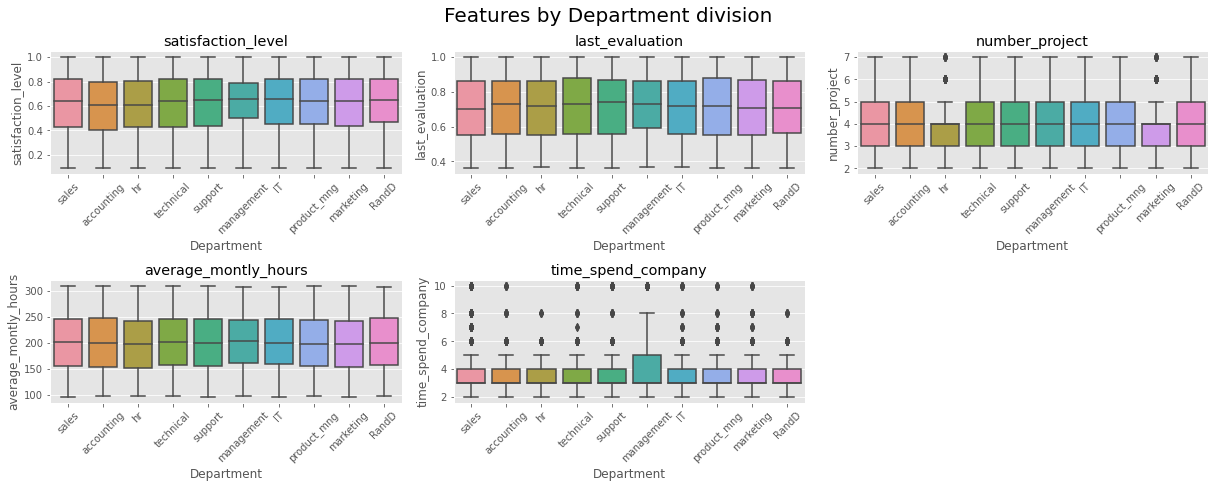

In [194]:
numeric_vs_categoric('Department','Department')

## Department vs categorical features

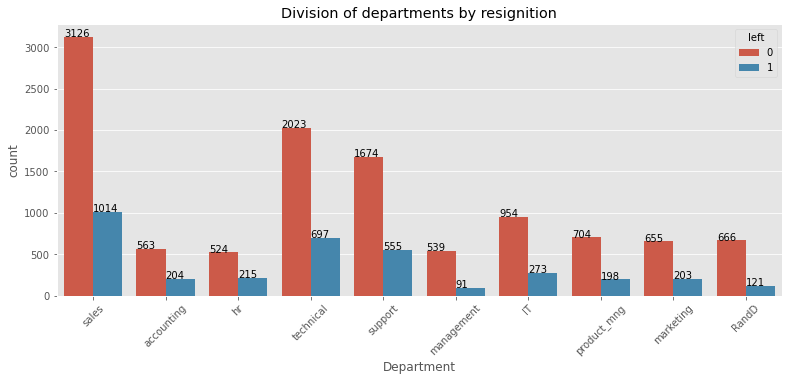

In [260]:
plt.figure(figsize=(13,5))
ax=sns.countplot(x='Department',hue='left',data=df)
for i in ax.patches:
    plt.annotate(i.get_height(),xy=(i.get_x(),i.get_height()))
plt.title('Division of departments by resignition')
plt.xticks(rotation=45);

The highest rate of leaving the firm belongs to Sales department. This is reasonable, at least the reason that this department had a highest number of workers

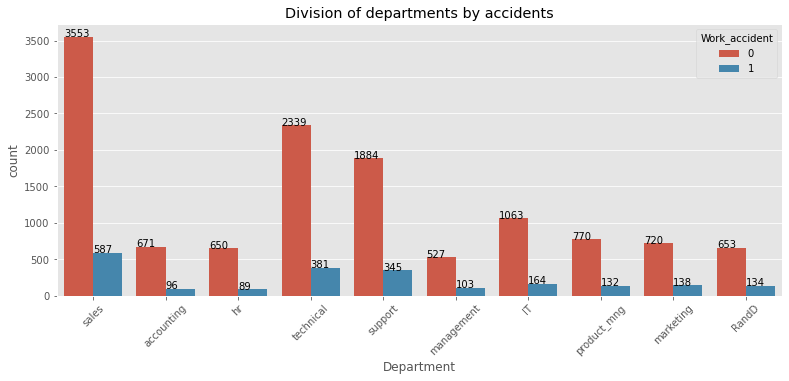

In [262]:
plt.figure(figsize=(13,5))
ax=sns.countplot(x='Department',hue='Work_accident',data=df)
for i in ax.patches:
    plt.annotate(i.get_height(),xy=(i.get_x(),i.get_height()))
plt.title('Division of departments by accidents')
plt.xticks(rotation=45);

Moreover, sales department had a huge number of accidents at work

## Numerc vs numeric feature

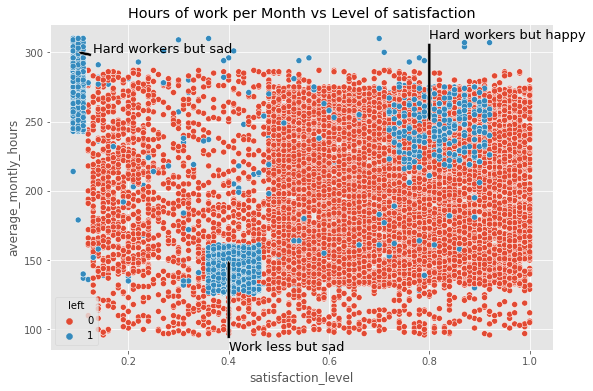

In [311]:
plt.figure(figsize=(9,6))
plt.title('Hours of work per Month vs Level of satisfaction')
sns.scatterplot(x='satisfaction_level',y='average_montly_hours',hue='left',data=df)
plt.annotate('Hard workers but sad',xy=(0.1,300),xytext=(0.13,300),arrowprops={'facecolor':'black','headlength':3,'headwidth':3,'width':3},fontsize=13)
plt.annotate('Hard workers but happy',xy=(0.8,250),xytext=(0.8,310),arrowprops={'facecolor':'black','headlength':3,'headwidth':3,'width':3},fontsize=13)
plt.annotate('Work less but sad',xy=(0.4,150),xytext=(0.4,85),arrowprops={'facecolor':'black','headlength':3,'headwidth':3,'width':3},fontsize=13);


Based on the graph above, we can clearly see three different clusters
1. __Cluster:__ People who work hard but not satisfied 
2. __Cluster:__ People who work hard but satisfied 
3. __Cluster:__ People who work less but not satisfied 

# ML models

### 1. Check for collinearity 
### 2. One-hot encoding of Department feature
### 3. Label encod of salary
### 4. Standard scaling

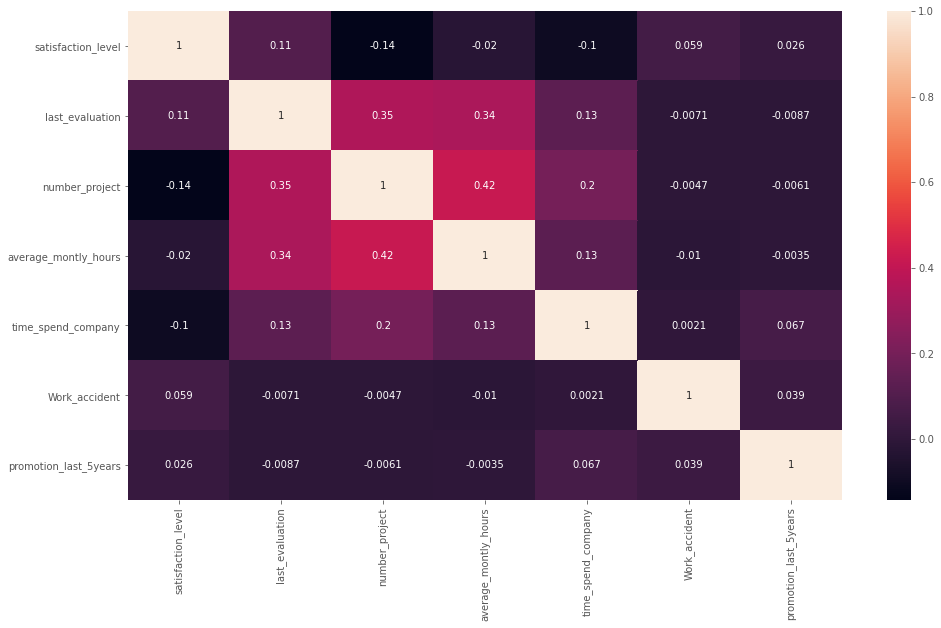

In [196]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),annot=True);

In [204]:
df1=df
df1['salary']=df1['salary'].replace({'low':1,'medium':2,'high':3})
dummy=pd.get_dummies(df1['Department'],drop_first=True)
df1=pd.concat([df1,dummy],axis='columns')
df1=df1.drop('Department',axis=1)
df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,1,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,2,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,2,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,1,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,1,0,0,0,0,0,0,1,0,0


In [338]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [206]:
x=df1.drop('left',axis=1)
y=df1['left'].values

In [207]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42,stratify=y)

In [208]:
scal=StandardScaler()
x_train_scaled=scal.fit_transform(x_train)
x_test_scaled=scal.transform(x_test)

___

## Logistic Regression

In [228]:
logreg=LogisticRegression()
logreg.fit(x_train_scaled,y_train)
pred_log=logreg.predict(x_test_scaled)
acc_lr=accuracy_score(y_test,pred_log)
acc_lr

0.794

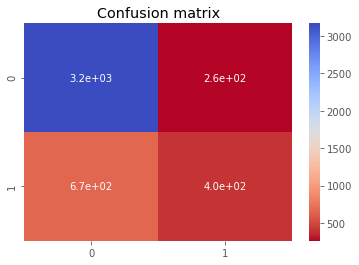

In [210]:
cm=confusion_matrix(y_test,pred_log)
sns.heatmap(cm,annot=True,cmap='coolwarm_r')
plt.title('Confusion matrix');

#### Hyperparameter tuning

In [246]:
params_logreg={
    'C':[0.5,0.7,0.9],
    'solver':['liblinear','saga'],
    'penalty':['l1','l2'],
    'class_weight' :[{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}]
}

In [247]:
grid_logreg=GridSearchCV(estimator=logreg,param_grid=params_logreg,cv=5,scoring='accuracy',n_jobs=-1)

In [248]:
grid_logreg.fit(x_train_scaled,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.5, 0.7, 0.9],
                         'class_weight': [{0: 0.5, 1: 0.5}, {0: 0.6, 1: 0.4},
                                          {0: 0.4, 1: 0.6}, {0: 0.3, 1: 0.7}],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [249]:
best_params=grid_logreg.best_params_
best_est=grid_logreg.best_estimator_
print('Best parameters are ',best_params)
print('Best estimator is ',best_est)

Best parameters are  {'C': 0.7, 'class_weight': {1: 0.5, 0: 0.5}, 'penalty': 'l2', 'solver': 'liblinear'}
Best estimator is  LogisticRegression(C=0.7, class_weight={0: 0.5, 1: 0.5}, solver='liblinear')


In [250]:
logreg_pred_best=best_est.predict(x_test_scaled)
accuracy_score(y_test,logreg_pred_best)

0.794

### Accuracy of LR is 79%

___

## Random Forest

In [227]:
rf=RandomForestClassifier(n_estimators=200,random_state=42)
rf.fit(x_train_scaled,y_train)
pred_rf=rf.predict(x_test_scaled)
acc_rf=accuracy_score(y_test,pred_rf)
acc_rf

0.9906666666666667

Lets find out the most important features

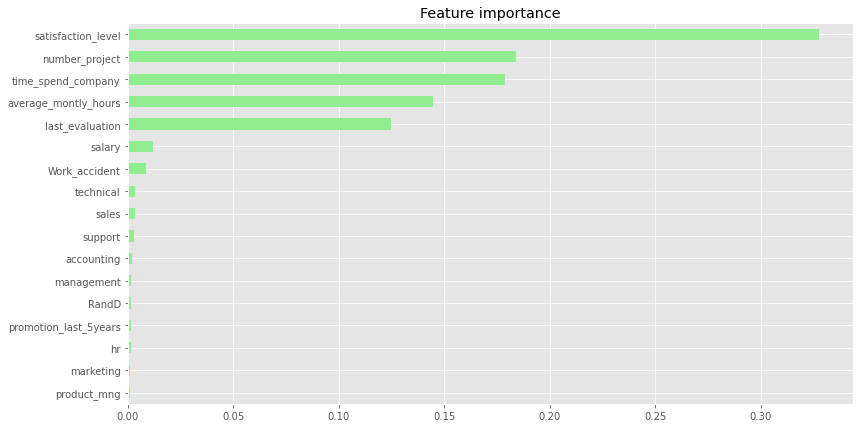

In [265]:
plt.figure(figsize=(13,7))
important=pd.Series(data=rf.feature_importances_,index=x_train.columns)
import_sort=important.sort_values()
import_sort.plot(kind='barh',color='lightgreen')
plt.title('Feature importance');

Trying to apply a hyperparameter tuning to increase the accuracy

In [215]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

#### Hyperparameter tuning

In [220]:
params_rf={
    'n_estimators':[100,200,300,400],
    'min_samples_leaf':[1,2,3,4,5],
    'max_depth':[4,8],
    'max_features':['auto','sqrt']
}

In [221]:
grid_rf=GridSearchCV(estimator=rf,param_grid=params_rf,cv=3,scoring='accuracy',n_jobs=-1)
grid_rf.fit(x_train_scaled,y_train)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(n_estimators=200,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [4, 8], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'n_estimators': [100, 200, 300, 400]},
             scoring='accuracy')

In [222]:
grid_rf.best_params_
grid_rf_best=grid_rf.best_estimator_
pred_rf_grid=grid_rf_best.predict(x_test_scaled)
accuracy_score(y_test,pred_rf_grid)

0.9797777777777777

Well, it made worse, so perfomance of RF is 99%

### Accuracy of Random Forest is ~99%!

___

## Decision Tree

In [229]:
dt=DecisionTreeClassifier()
dt.fit(x_train_scaled,y_train)
pred_dt=dt.predict(x_test_scaled)
acc_dt=accuracy_score(y_test,pred_dt)
acc_dt

0.9726666666666667

### Accuracy of Decision Tree is 97%

___

# KNeighborsClassifier

In [357]:
knn=KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train_scaled,y_train)
pred_knn=knn.predict(x_test_scaled)
acc_knn=accuracy_score(y_test,pred_knn)
acc_knn

0.9475555555555556

#### Hyperparameter tuning

In [353]:
params_knn={'n_neighbors':[3,4,5,6,8,10,12,15]}

In [354]:
grid_knn=GridSearchCV(estimator=knn,cv=5,param_grid=params_knn,scoring='accuracy')
grid_knn.fit(x_train_scaled,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=10),
             param_grid={'n_neighbors': [3, 4, 5, 6, 8, 10, 12, 15]},
             scoring='accuracy')

In [355]:
best_grid_knn_model=grid_knn.best_estimator_
grid_knn_pred=best_grid_knn_model.predict(x_test_scaled)
best_grid_knn_model

KNeighborsClassifier(n_neighbors=4)

In [356]:
acc_knn_grid=accuracy_score(y_test,grid_knn_pred)
acc_knn_grid

0.9493333333333334

### Accuracy of KNN is 95 % after Hyperparameter tuning with 4 n_neighbors

In [358]:
df_acc=pd.DataFrame({'Model':['Logistic Regression','RandomForest','DecisionTree','KNN']\
                    ,'Accuracy':[acc_lr*100,acc_rf*100,acc_dt*100,acc_knn_grid*100]}).style.background_gradient(cmap='flag_r')
df_acc

,Model,Accuracy
0,Logistic Regression,79.400000
1,RandomForest,99.066667
2,DecisionTree,97.266667
3,KNN,94.933333


## Conclusion: We conducted several ML models, the best one is Random Forest that predicted almost all test data

# BUT

__BUT__! Even though accuracy for Random forest is pretty high, this metric might easily change depending on which cutoff point we would choose. Therefore, we have to consider various treshold and compare AUC metric

In [318]:
from sklearn.metrics import roc_auc_score,roc_curve

In [359]:
auc_lf=roc_auc_score(y_test,logreg.predict_proba(x_test_scaled)[:,1])
auc_rf=roc_auc_score(y_test,rf.predict_proba(x_test_scaled)[:,1])
auc_dt=roc_auc_score(y_test,dt.predict_proba(x_test_scaled)[:,1])
auc_knn=roc_auc_score(y_test,best_grid_knn_model.predict_proba(x_test_scaled)[:,1])

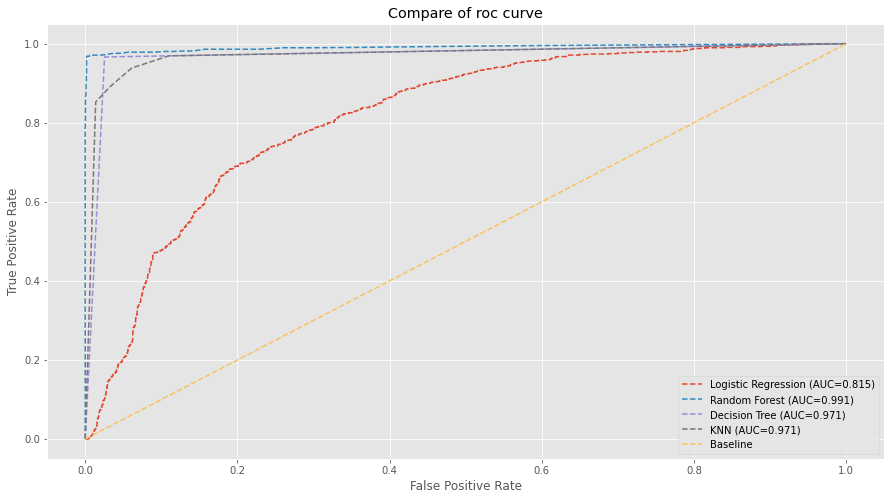

In [360]:
plt.figure(figsize=(15,8))
fpr_lg,tpr_lg,thr_lg=roc_curve(y_test,logreg.predict_proba(x_test_scaled)[:,1])
fpr_rf,tpr_rf,thr_rf=roc_curve(y_test,rf.predict_proba(x_test_scaled)[:,1])
fpr_dt,tpr_dt,thr_dt=roc_curve(y_test,dt.predict_proba(x_test_scaled)[:,1])
fpr_knn,tpr_knn,thr_knn=roc_curve(y_test,best_grid_knn_model.predict_proba(x_test_scaled)[:,1])

plt.plot(fpr_lg,tpr_lg,linestyle='--',label='Logistic Regression (AUC=%0.3f)'%auc_lf)
plt.plot(fpr_rf,tpr_rf,linestyle='--',label='Random Forest (AUC=%0.3f)' %auc_rf)
plt.plot(fpr_dt,tpr_dt,linestyle='--',label='Decision Tree (AUC=%0.3f)' %auc_dt)
plt.plot(fpr_knn,tpr_knn,linestyle='--',label='KNN (AUC=%0.3f)' %auc_knn)
plt.plot([0,1],[0,1],linestyle='--',label='Baseline')
plt.title('Compare of roc curve')
plt.legend(loc='lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

## Conclusion: Indeed, despite of different thresholds Randomf Forest perfoms better anyway